In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
# Paths to dataset
train_dir = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\training"
validation_dir = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\validation"
test_dir = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\testing"

In [ ]:
# Image dimensions and batch size
img_height, img_width = 299,299
batch_size = 32

In [ ]:
# Define the ImageDataGenerator for training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)


In [ ]:
# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Example: Loop through a few batches of the training data
for i, (images, labels) in enumerate(train_generator):
    print(f"Batch {i+1}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Stop after 3 batches
    if i == 32:
        break


Found 3797 images belonging to 2 classes.
Batch 1
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 2
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 3
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 4
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 5
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 6
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 7
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 8
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 9
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 10
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 11
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 12
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 13
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 14
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 15
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 16
Images shape: (32, 299, 299, 3)
Labels shap

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)
# Example: Loop through a few batches of the training data
for i, (images, labels) in enumerate(validation_generator):
    print(f"Batch {i+1}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Stop after 3 batches
    if i == 32:
        break


Found 1085 images belonging to 2 classes.
Batch 1
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 2
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 3
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 4
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 5
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 6
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 7
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 8
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 9
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 10
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 11
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 12
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 13
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 14
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 15
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 16
Images shape: (32, 299, 299, 3)
Labels shap

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Ensure the order matches for confusion matrix
)

for i, (images, labels) in enumerate(test_generator):
    print(f"Batch {i+1}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Stop after 3 batches
    if i == 32:
        break

Found 544 images belonging to 2 classes.
Batch 1
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 2
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 3
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 4
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 5
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 6
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 7
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 8
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 9
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 10
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 11
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 12
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 13
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 14
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 15
Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Batch 16
Images shape: (32, 299, 299, 3)
Labels shape

Class Weights: {0: 0.991901776384535, 1: 1.0082315454062667}


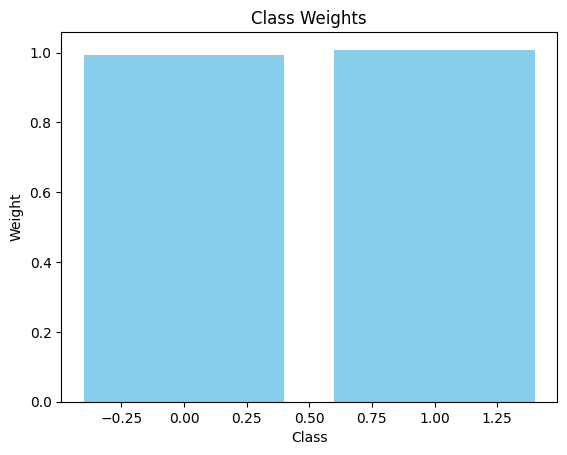

In [ ]:

# Calculate class weights to address class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Visualize class weights
plt.bar(class_weights.keys(), class_weights.values(), color='skyblue')
plt.title("Class Weights")
plt.xlabel("Class")
plt.ylabel("Weight")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import Xception

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Build a custom model with Xception as the base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification (real/fake)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,042,153 (84.08 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
for i, (images, labels) in enumerate(train_generator):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Images dtype:", images.dtype)
    print("Labels dtype:", labels.dtype)
    if i == 0:
        break


Images shape: (32, 299, 299, 3)
Labels shape: (32,)
Images dtype: float32
Labels dtype: float32


In [ ]:
print("Train batch size:", train_generator.batch_size)
print("Validation batch size:", validation_generator.batch_size)


Train batch size: 32
Validation batch size: 32


In [ ]:
# Train the model with class weights
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
)

c:\Users\Shubhankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.8876 - loss: 0.2450 - val_accuracy: 0.9899 - val_loss: 0.0253
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9732 - loss: 0.0726 - val_accuracy: 0.9825 - val_loss: 0.0445
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9841 - loss: 0.0580 - val_accuracy: 0.9908 - val_loss: 0.0235
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9824 - loss: 0.0570 - val_accuracy: 0.9917 - val_loss: 0.0247
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9887 - loss: 0.0286 - val_accuracy: 0.9899 - val_loss: 0.0290
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9890 - loss: 0.0342 - val_accuracy: 0.9945 - val_loss: 0.0156
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9937 - loss: 0.0228 - val_accuracy: 0.9954 - val_loss: 0.0193
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9916 - loss: 0.0234 - val_accu

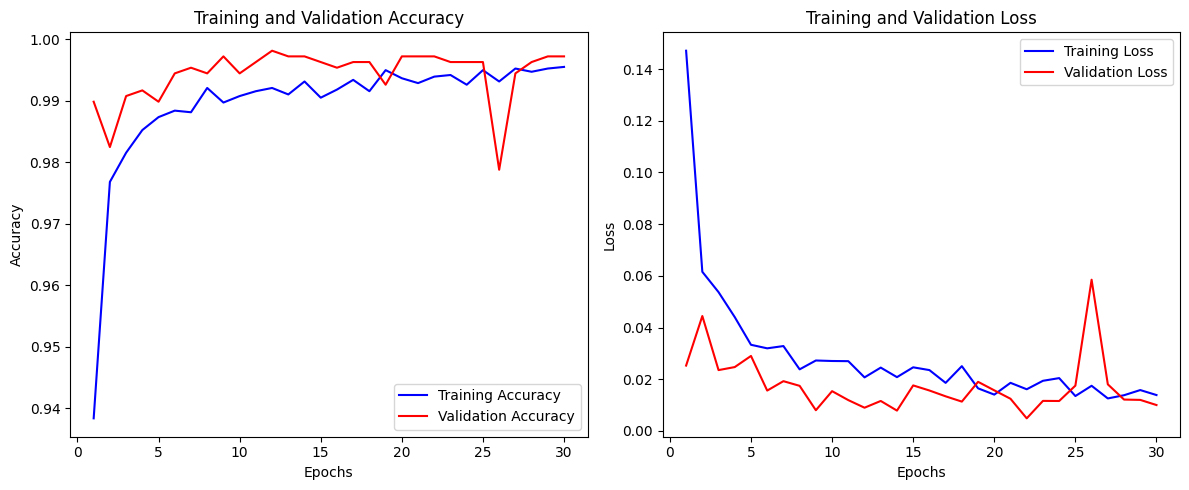

In [ ]:

# Extract data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# Unfreeze selected layers for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers
    layer.trainable = True

In [ ]:
# Recompile with a lower learning rate for fine-tuning
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8840 - loss: 0.5472 - val_accuracy: 0.9963 - val_loss: 0.0083
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9786 - loss: 0.0815 - val_accuracy: 0.9926 - val_loss: 0.0120
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9829 - loss: 0.0668 - val_accuracy: 0.9917 - val_loss: 0.0166
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9893 - loss: 0.0261 - val_accuracy: 0.9917 - val_loss: 0.0183
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9952 - loss: 0.0133 - val_accuracy: 0.9917 - val_loss: 0.0205
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9887 - loss: 0.0334 - val_accuracy: 0.9935 - val_loss: 0.0153
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9949 - loss: 0.0124 - val_accuracy: 0.9917 - val_loss: 0.0166
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.9919 - loss: 0.0238 - val_accu

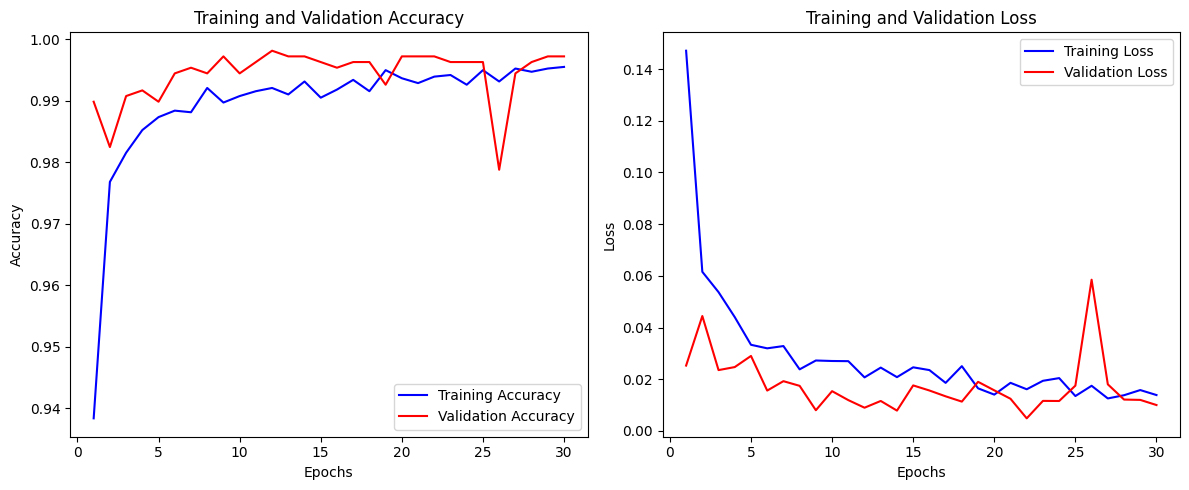

In [ ]:
# Extract data from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 1.0000 - loss: 4.9655e-04
Test Accuracy: 1.00


17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step


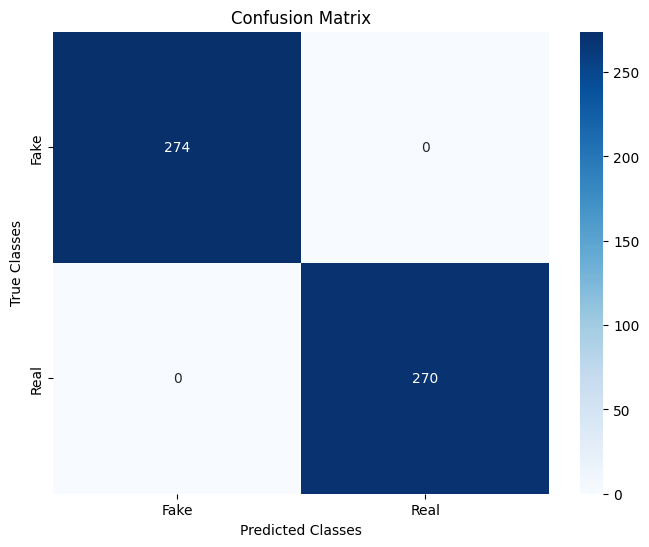

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       274
        Real       1.00      1.00      1.00       270

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544



In [ ]:

# Predict classes
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(test_generator.classes, y_pred_classes, target_names=['Fake', 'Real']))


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

def generate_performance_matrix(generator, dataset_name):
    # Predict probabilities for all images
    y_pred = model.predict(generator)

    # Convert probabilities to class predictions
    y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

    # Get true labels
    true_classes = generator.classes

    # Class labels
    class_labels = list(generator.class_indices.keys())  # ['Fake', 'Real']

    # Generate classification report as a dictionary
    report_dict = classification_report(true_classes, y_pred_classes, target_names=class_labels, output_dict=True)

    # Convert to DataFrame for better display
    report_df = pd.DataFrame(report_dict).transpose()

    print(f"\nPerformance Matrix for {dataset_name} Dataset:\n")
    print(report_df)

# Generate performance matrices for train, validation, and test datasets
generate_performance_matrix(train_generator, "Training")
generate_performance_matrix(validation_generator, "Validation")
generate_performance_matrix(test_generator, "Test")


119/119 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step

Performance Matrix for Training Dataset:

              precision    recall  f1-score      support
Real           0.497910  0.497910  0.497910  1914.000000
fake           0.489644  0.489644  0.489644  1883.000000
accuracy       0.493811  0.493811  0.493811     0.493811
macro avg      0.493777  0.493777  0.493777  3797.000000
weighted avg   0.493811  0.493811  0.493811  3797.000000
34/34 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step

Performance Matrix for Validation Dataset:

              precision    recall  f1-score      support
Real           0.515539  0.515539  0.515539   547.000000
fake           0.507435  0.507435  0.507435   538.000000
accuracy       0.511521  0.511521  0.511521     0.511521
macro avg      0.511487  0.511487  0.511487  1085.000000
weighted avg   0.511521  0.511521  0.511521  1085.000000
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step

Performance Matrix for Test Dataset:

              precision  recall  f1-score  support
Real              

119/119 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step


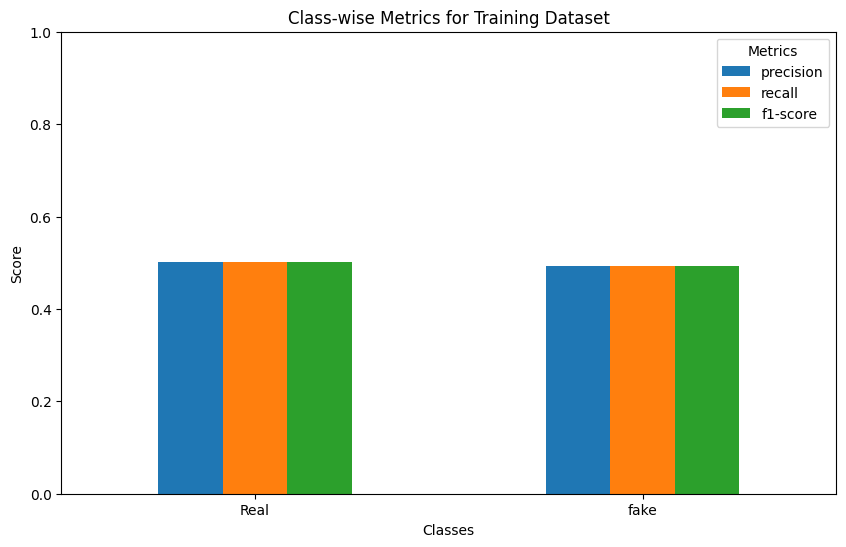

34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


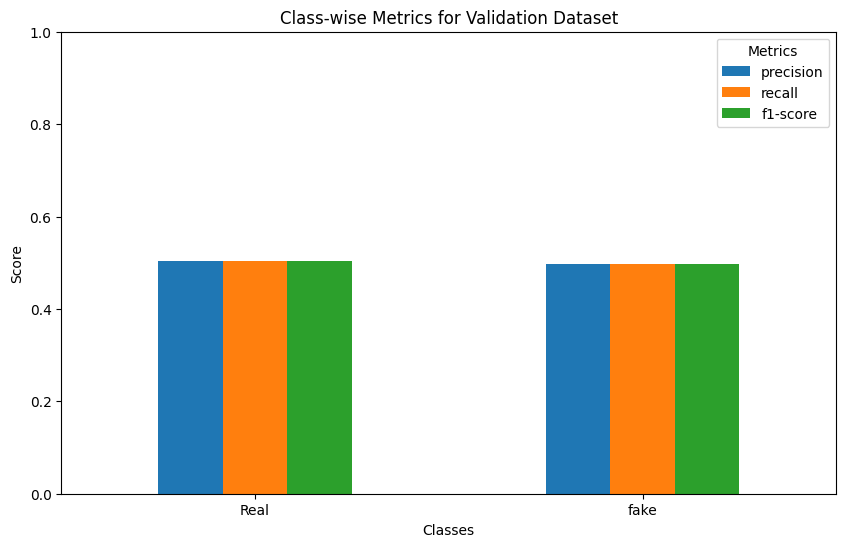

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step


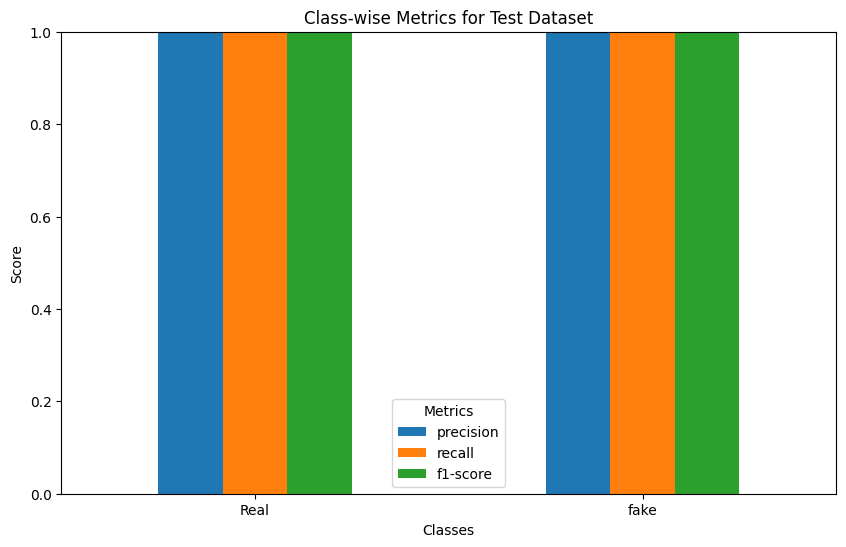

In [ ]:

def plot_classwise_metrics(generator, dataset_name):
    # Generate classification report as a dictionary
    y_pred = model.predict(generator)
    y_pred_classes = (y_pred > 0.5).astype("int32").flatten()
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())
    report_dict = classification_report(true_classes, y_pred_classes, target_names=class_labels, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Select relevant metrics
    metrics = ['precision', 'recall', 'f1-score']
    report_df = report_df.iloc[:-3][metrics]  # Exclude averages

    # Plot bar chart
    report_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Class-wise Metrics for {dataset_name} Dataset")
    plt.xlabel("Classes")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(title="Metrics")
    plt.show()

# Plot for training, validation, and test datasets
plot_classwise_metrics(train_generator, "Training")
plot_classwise_metrics(validation_generator, "Validation")
plot_classwise_metrics(test_generator, "Test")


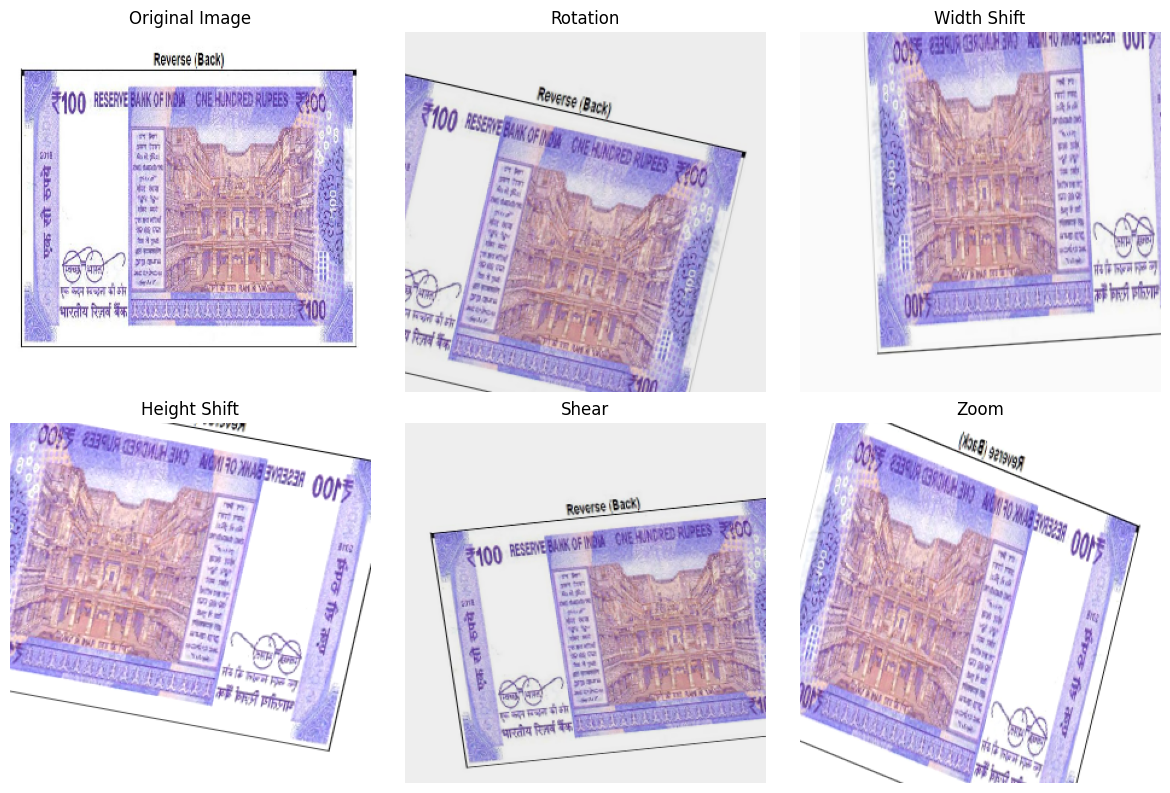

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

# Parameters
img_height, img_width = 299, 299  # Updated to 299x299

# Define the ImageDataGenerator with the same parameters used during training
post_train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)

# Load a sample image from the dataset
sample_dir = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\testing\real"  # Adjust the path to your dataset
sample_image_path = os.path.join(sample_dir, os.listdir(sample_dir)[0])  # Pick the first image
sample_image = load_img(sample_image_path, target_size=(img_height, img_width))  # Load and resize the image
sample_array = img_to_array(sample_image)  # Convert to numpy array
sample_array = np.expand_dims(sample_array, axis=0)  # Add batch dimension

# Generate augmented samples (limit to 5)
augmented_samples = [post_train_datagen.flow(sample_array, batch_size=1).__next__()[0] for _ in range(5)]

# Plot the original and augmented images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)  # First subplot
plt.imshow(np.array(sample_image) / 255.0)  # Convert to NumPy array and normalize
plt.title("Original Image")
plt.axis("off")

# Augmented images with labels
titles = [
    "Rotation",
    "Width Shift",
    "Height Shift",
    "Shear",
    "Zoom",
]
for i, img in enumerate(augmented_samples):
    plt.subplot(2, 3, i + 2)  # Ensure the subplot indices are within range
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


input_layer_2
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d_4
block2_pool
batch_normalization_4
add_12
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_5
block3_pool
batch_normalization_5
add_13
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_6
block4_pool
batch_normalization_6
add_14
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_15
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_16
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2

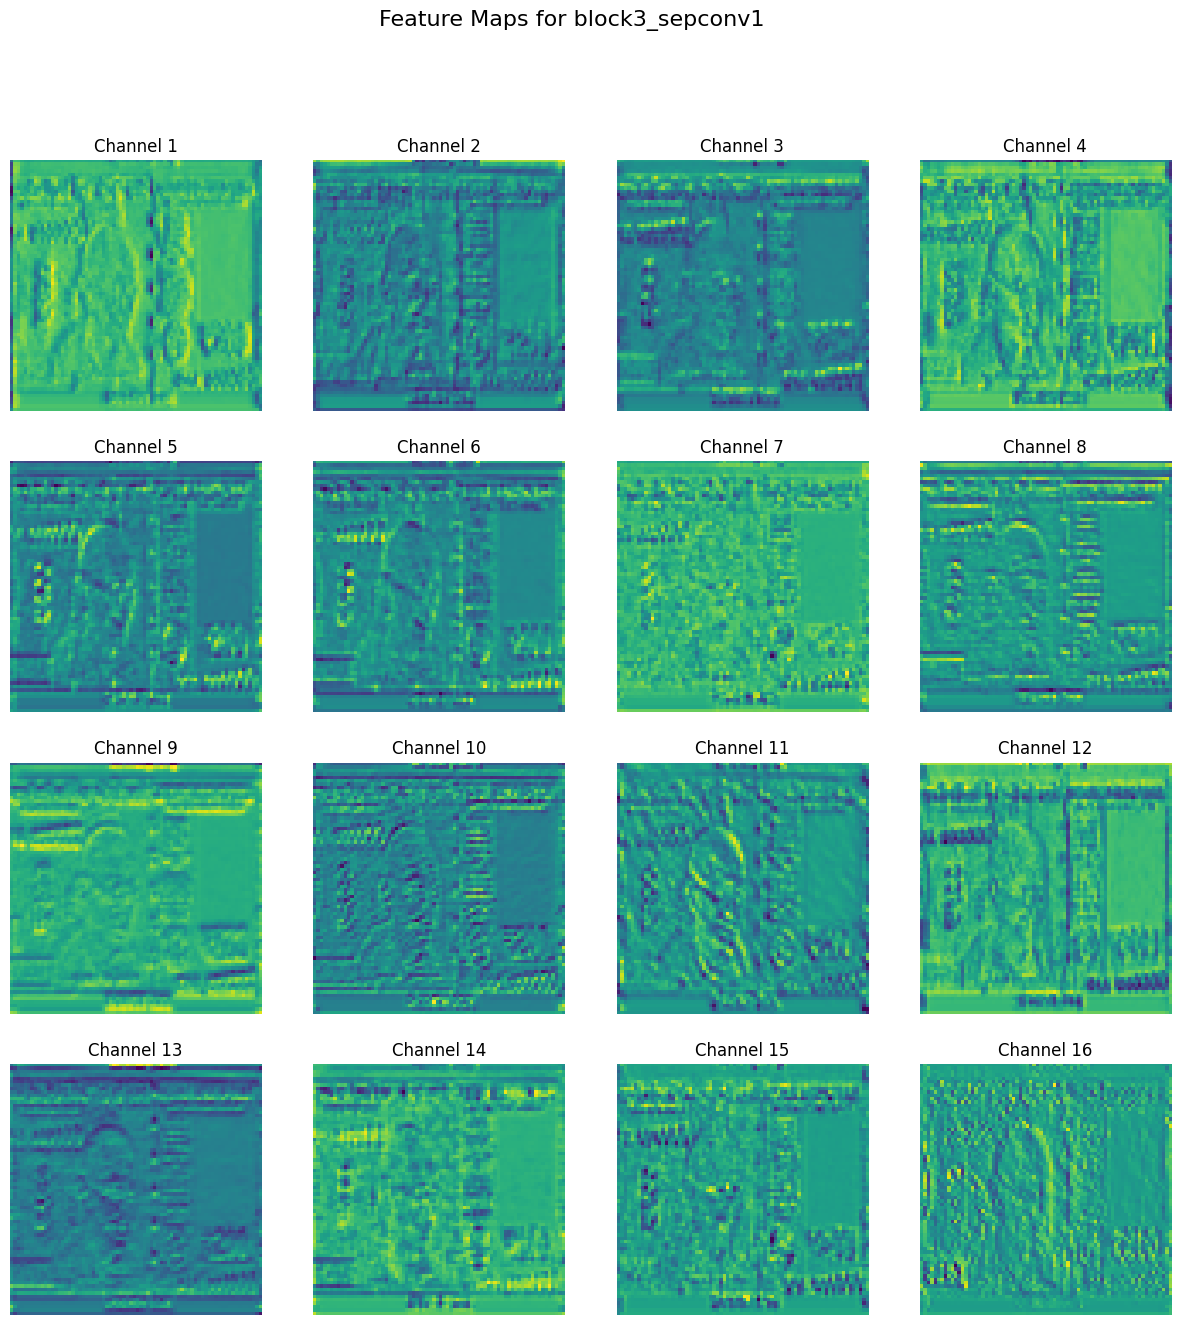

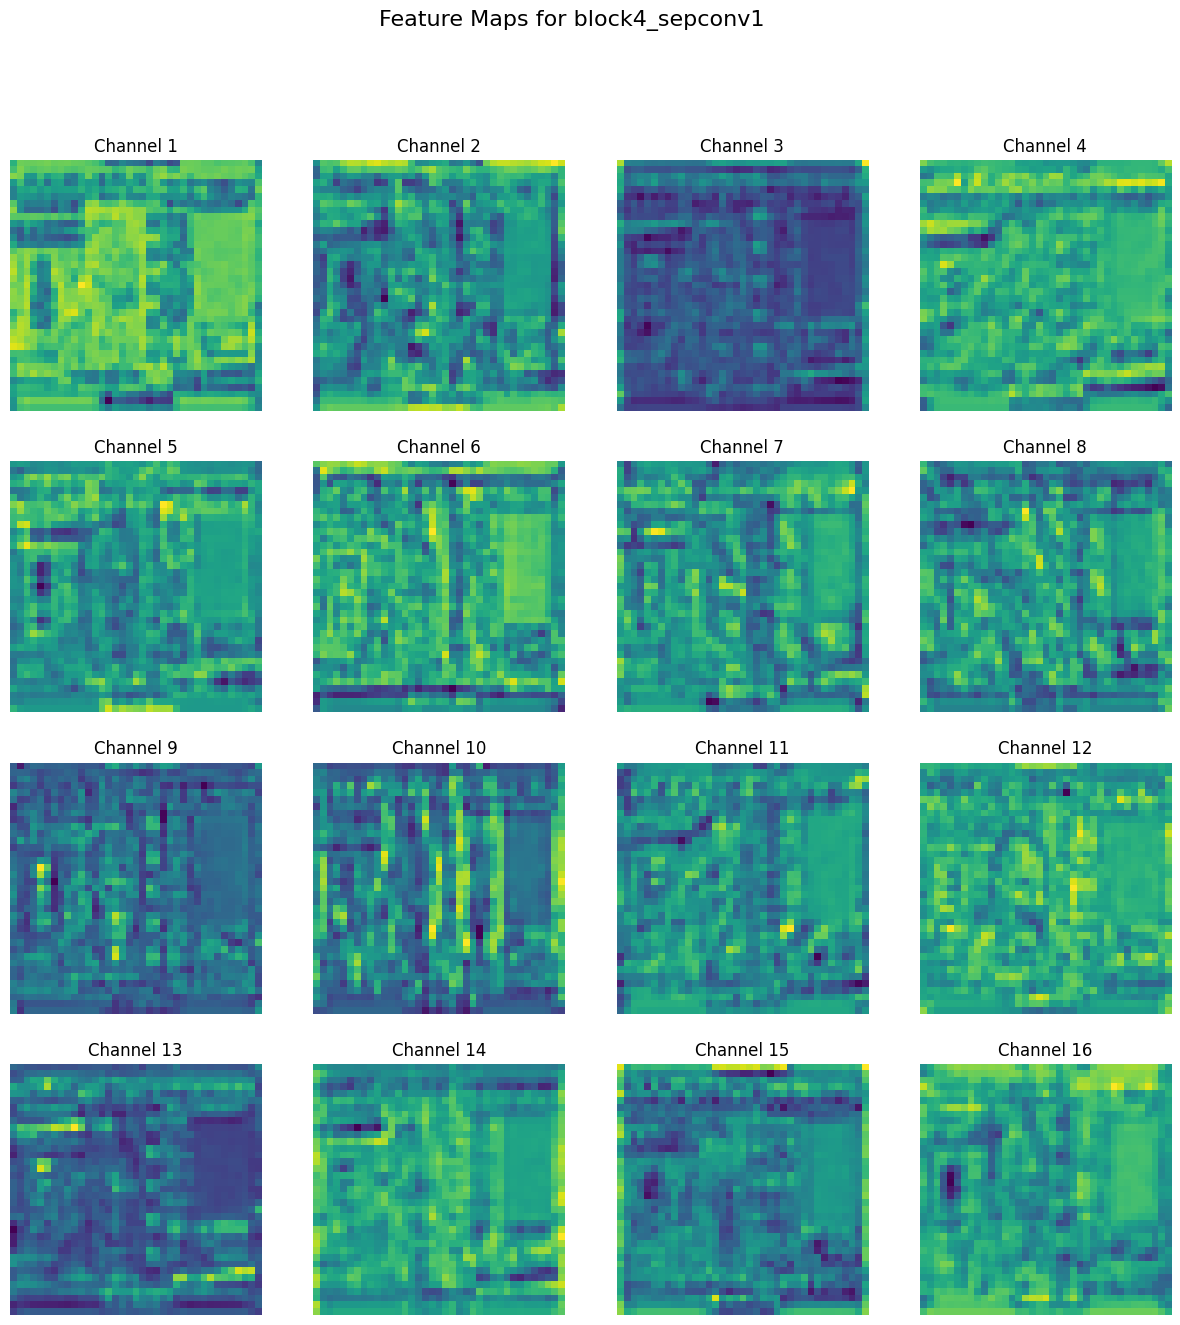

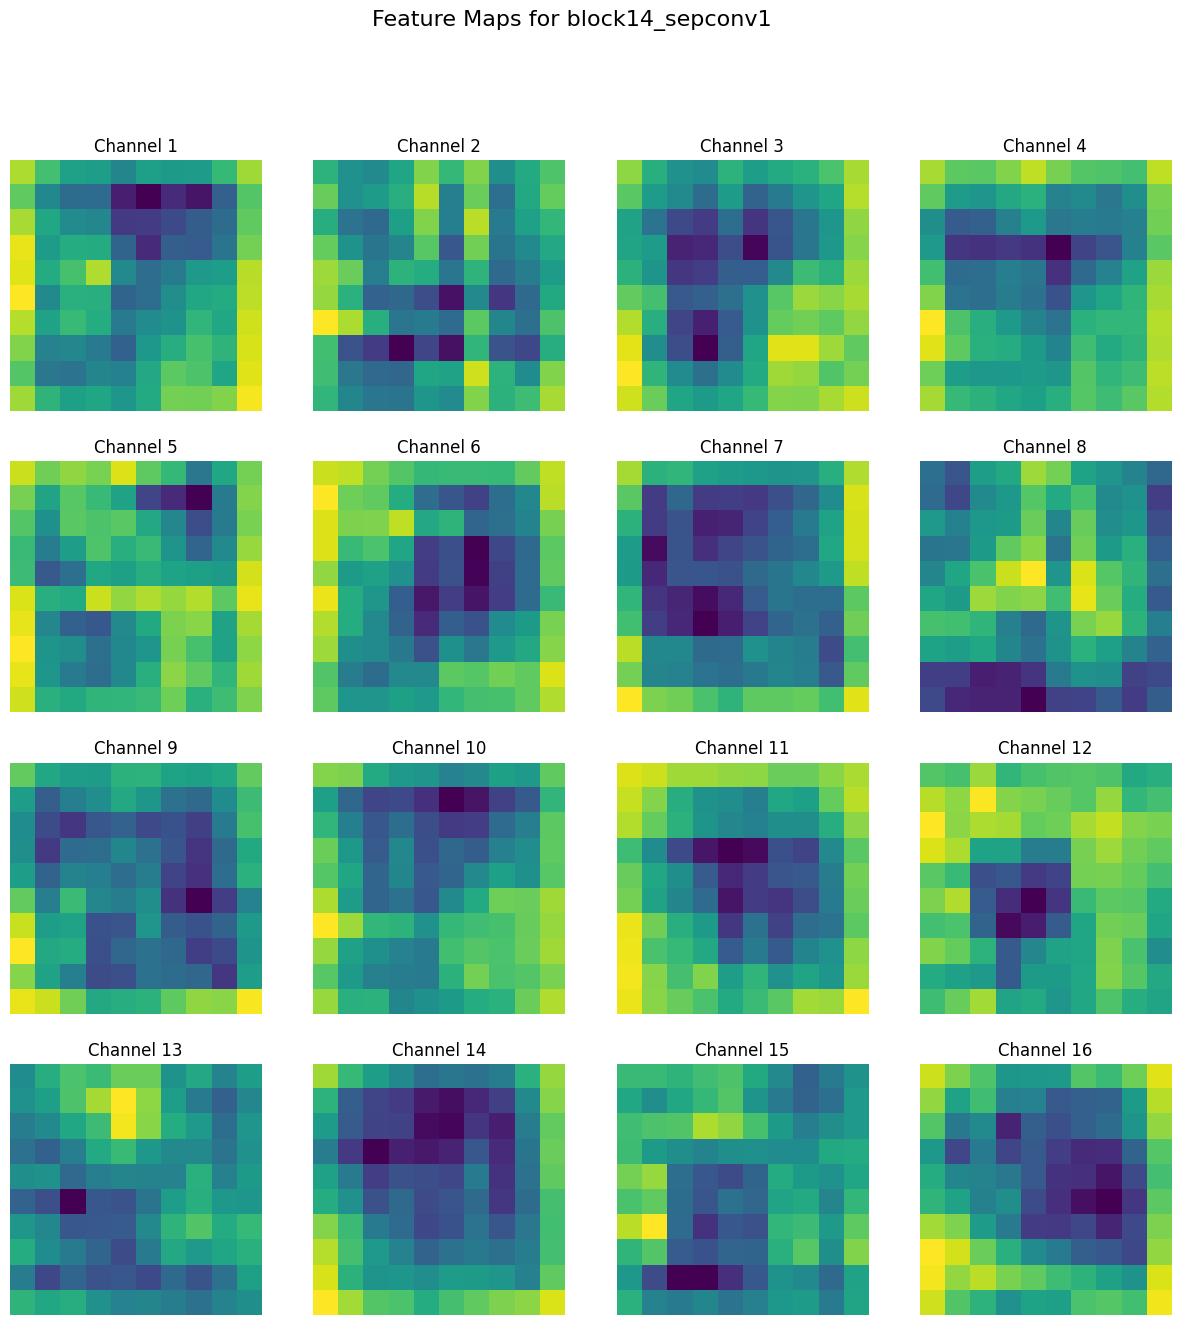

Visualizing feature maps for fake image:


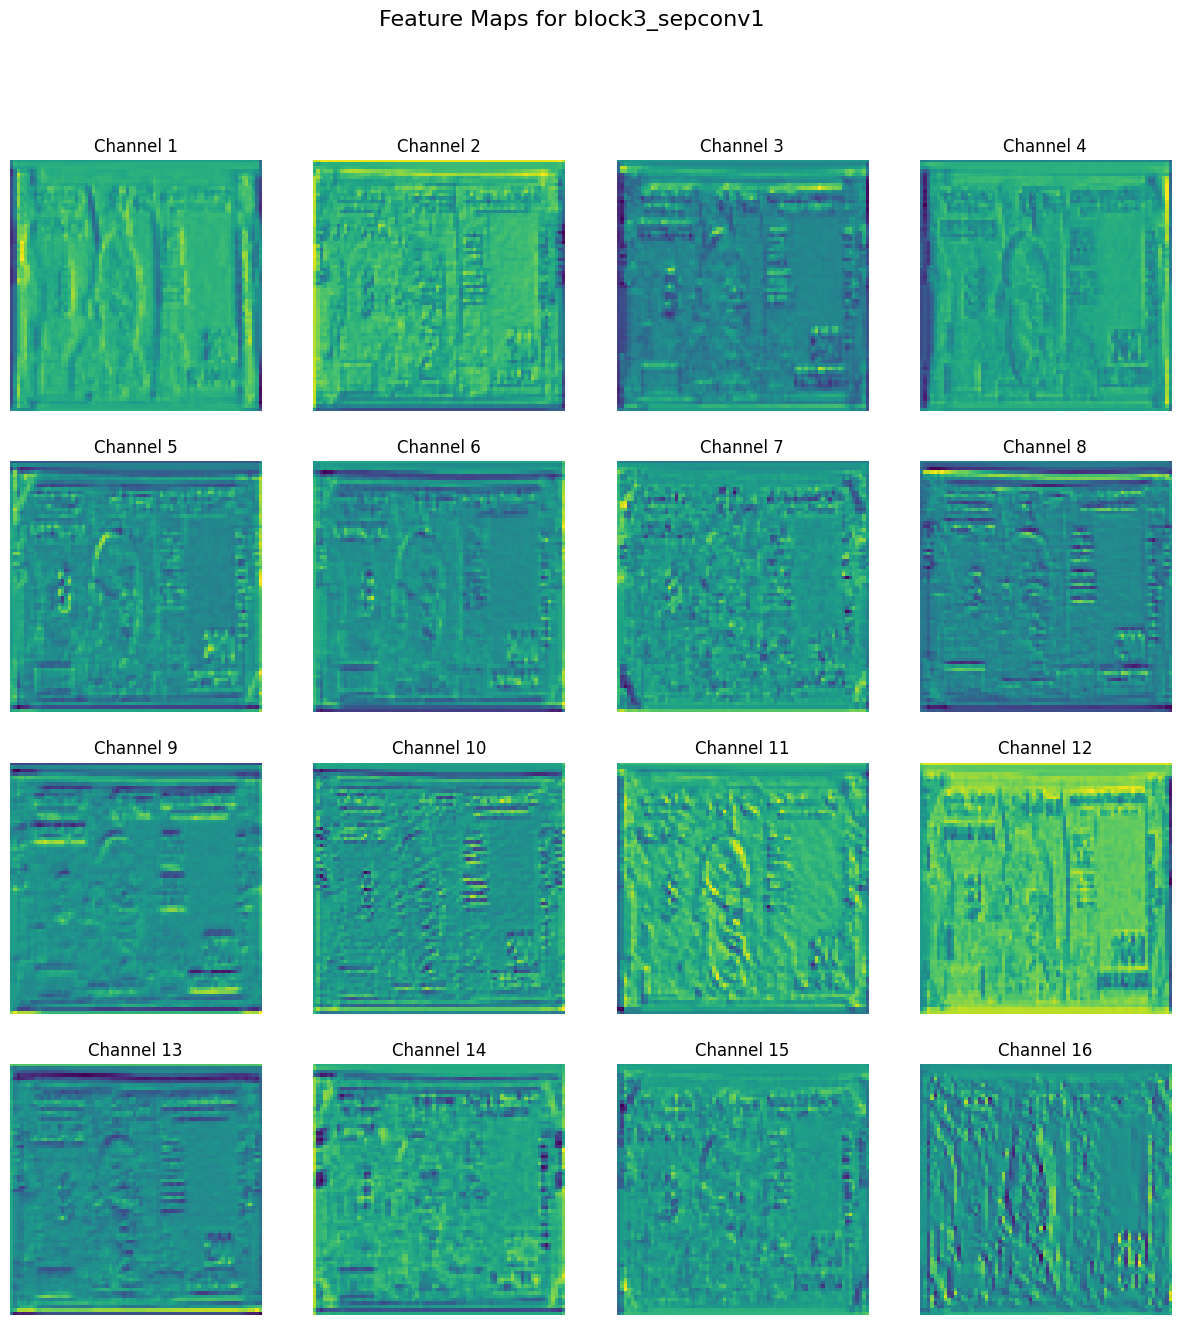

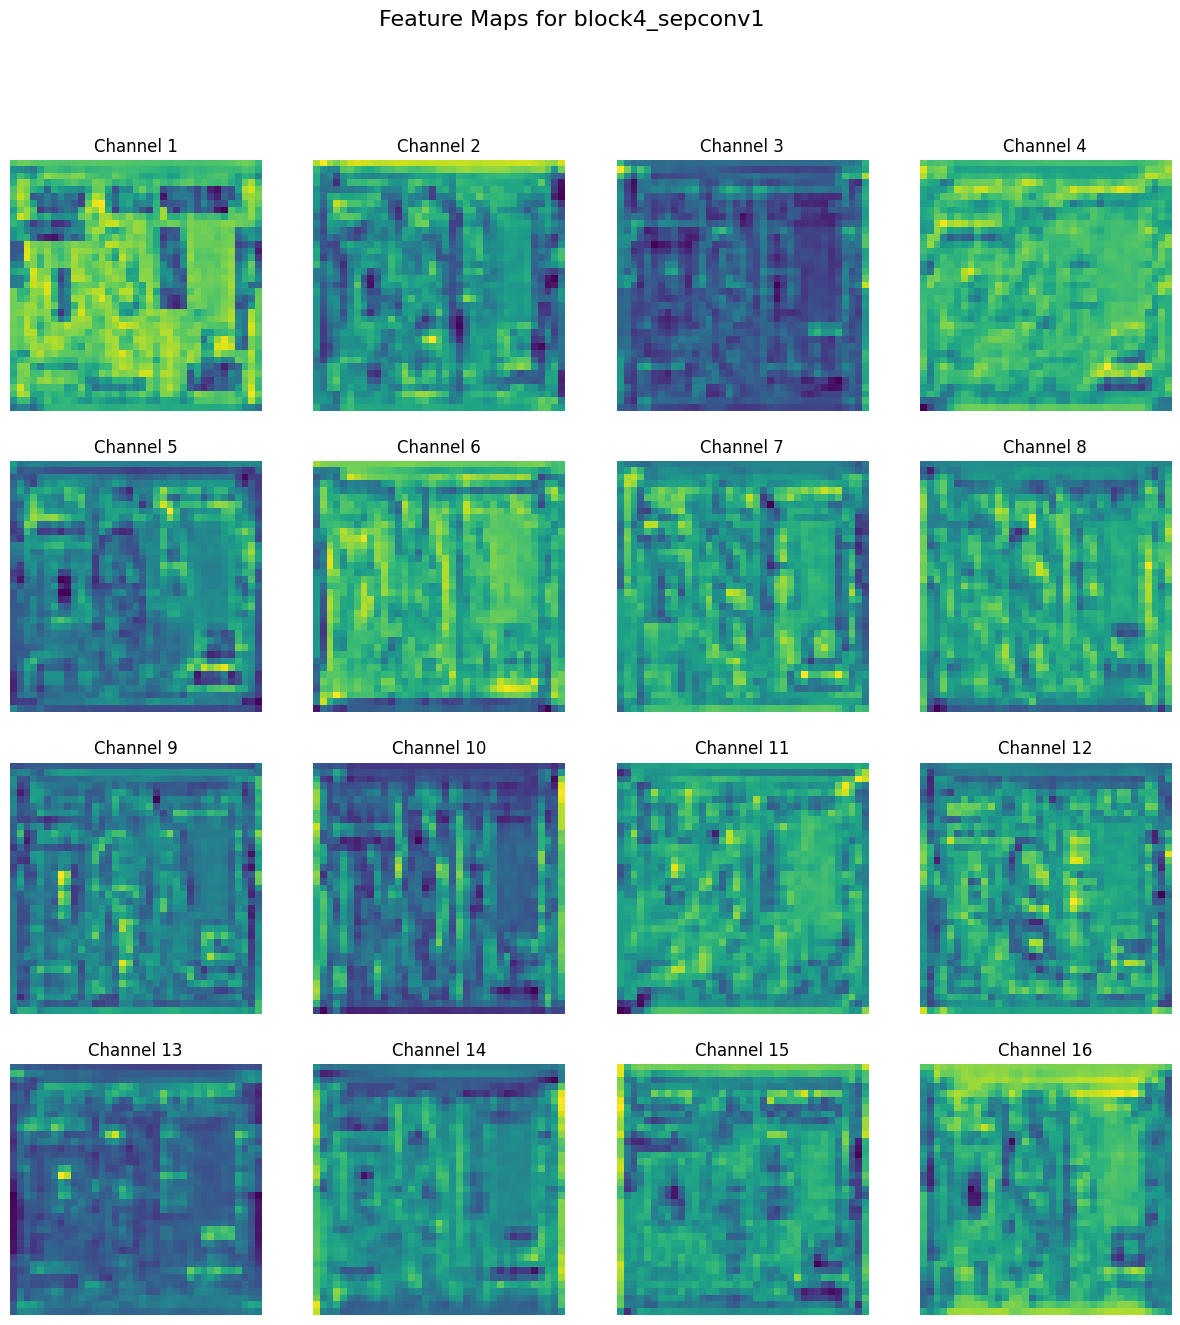

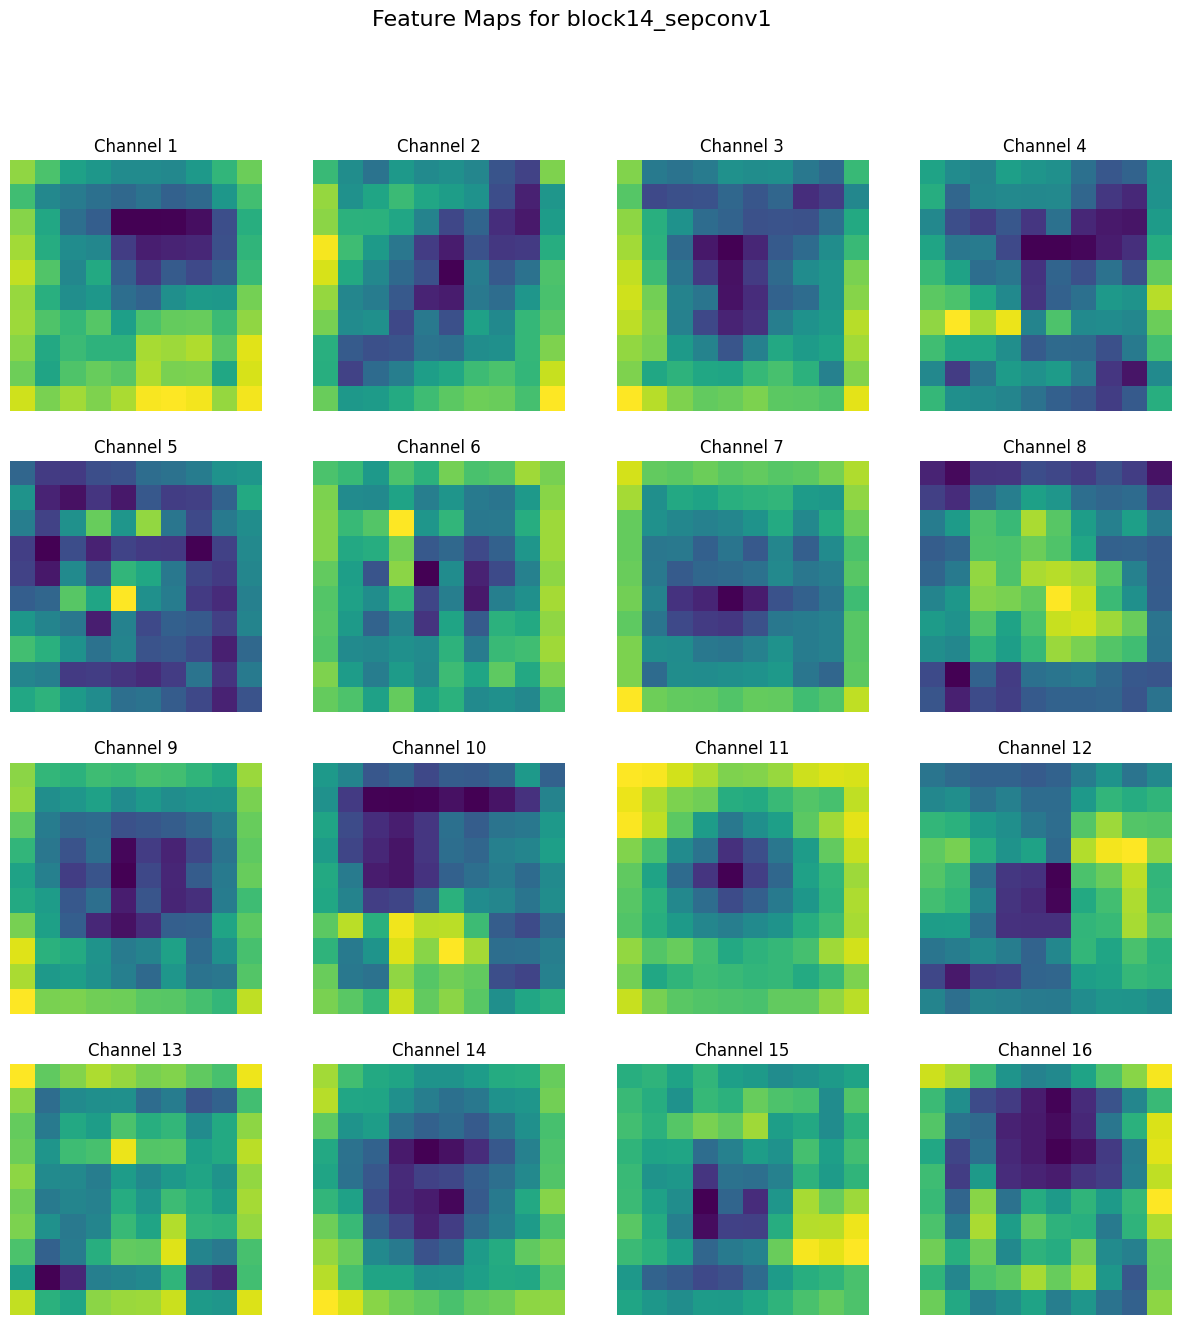

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

# Load the Xception model
base_model = Xception(weights="imagenet", include_top=False)

# Display available layer names for reference
for layer in base_model.layers:
    print(layer.name)

# Specify the layers for feature extraction (replace with valid layers from the model summary)
layer_names = ["block3_sepconv1", "block4_sepconv1", "block14_sepconv1"]  # Example valid layers
layer_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create a feature extraction model
feature_extraction_model = Model(inputs=base_model.input, outputs=layer_outputs)

# Real and fake image paths
real_image_path = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\validation\Real\200.__19.jpg"
fake_image_path = r"C:\Users\Shubhankar\OneDrive\Pictures\Screenshots\Screenshot 2024-10-12 202429.png"

# Function to preprocess image and extract features
def preprocess_and_extract_features(image_path):
    # Load image and preprocess
    img = load_img(image_path, target_size=(299, 299))  # Resize image to 299x299
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Extract feature maps
    feature_maps = feature_extraction_model.predict(img_array)
    return feature_maps

# Extract features for real and fake images
real_feature_maps = preprocess_and_extract_features(real_image_path)
fake_feature_maps = preprocess_and_extract_features(fake_image_path)

# Visualization function
def visualize_feature_maps(feature_maps, layer_names):
    for fmap, name in zip(feature_maps, layer_names):
        fmap = np.squeeze(fmap, axis=0)  # Remove batch dimension
        num_channels = fmap.shape[-1]

        plt.figure(figsize=(15, 15))
        plt.suptitle(f"Feature Maps for {name}", fontsize=16)

        # Display the first 16 feature maps
        for i in range(min(16, num_channels)):  # Adjust number of feature maps to visualize
            plt.subplot(4, 4, i + 1)
            plt.imshow(fmap[..., i], cmap="viridis")
            plt.title(f"Channel {i+1}")
            plt.axis("off")

        plt.show()

# Visualize feature maps for real and fake images
print("Visualizing feature maps for real image:")
visualize_feature_maps(real_feature_maps, layer_names)

print("Visualizing feature maps for fake image:")
visualize_feature_maps(fake_feature_maps, layer_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


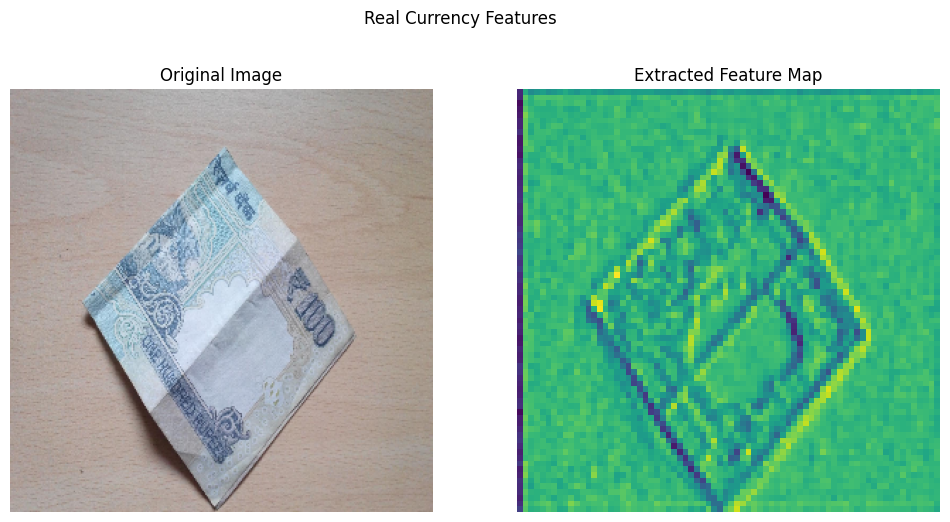

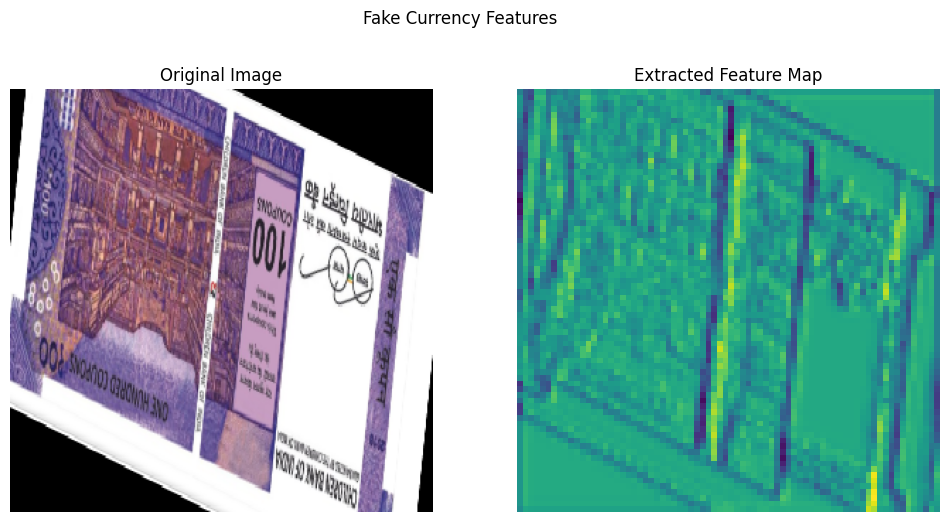

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import tensorflow as tf

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet')

# Select a valid layer you want to visualize (use 'block3_sepconv1' instead of 'block3_conv1')
layer_name = 'block3_sepconv1'  # Updated to a valid layer name
layer_output = base_model.get_layer(layer_name).output

# Create a model that outputs the features from the selected layer
feature_model = Model(inputs=base_model.input, outputs=layer_output)

# Function to preprocess image and get features
def preprocess_and_extract_features(image_path):
    # Load and resize the image to the size expected by Xception (299x299)
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.xception.preprocess_input(img_array)  # Preprocess for Xception

    # Extract features using the feature model
    features = feature_model.predict(img_array)
    return features, img

# Load and process the real and fake currency images
real_image_path = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\testing\Real\100__60.jpg"
fake_image_path = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\testing\fake\lp (34).png"

real_features, real_img = preprocess_and_extract_features(real_image_path)
fake_features, fake_img = preprocess_and_extract_features(fake_image_path)

# Function to display the original image and extracted features
def display_features(original_img, features, title=""):
    plt.figure(figsize=(12, 6))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    # Display one of the feature maps from the extracted features
    # We choose the first feature map in the output for visualization
    feature_map = features[0, :, :, 0]  # Select the first feature map from the layer output
    plt.subplot(1, 2, 2)
    plt.imshow(feature_map, cmap='viridis')
    plt.title("Extracted Feature Map")
    plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Display features for both real and fake images
display_features(real_img, real_features, title="Real Currency Features")
display_features(fake_img, fake_features, title="Fake Currency Features")


In [ ]:
# Predictions for confusion matrix
test_predictions = (model.predict(test_generator) > 0.5).astype(int).flatten()
true_labels = test_generator.classes

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step


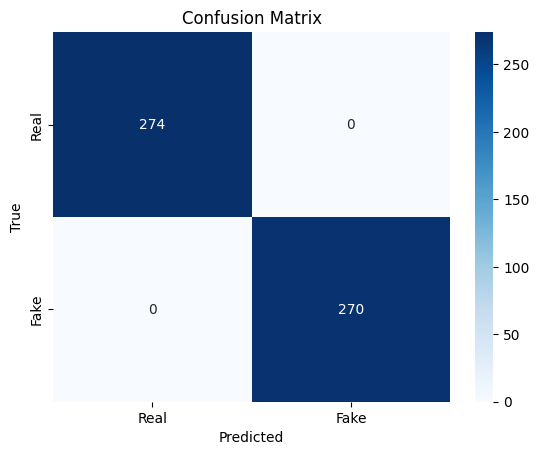

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from collections import Counter
print(Counter(train_generator.classes))  # Shows the distribution of classes in the training set

Counter({0: 1914, 1: 1883})


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 1.0000 - loss: 4.9655e-04
Test Loss: 0.001086511998437345, Test Accuracy: 1.0


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = r"C:\Users\Shubhankar\OneDrive\Desktop\organized_data\validation\Real\500__171.jpg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Match training preprocessing

# Extract image name from the path
img_name = os.path.basename(img_path)

# Make prediction
prediction = model.predict(img_array)
print(f"Raw prediction score for '{img_name}': {prediction[0][0]}")

# Threshold for classification
threshold = 0.7
if prediction[0][0] >= threshold:
    print(f"Predicted: Fake Currency (Image: {img_name})")
else:
    print(f"Predicted: Real Currency (Image: {img_name})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Raw prediction score for '500__171.jpg': 5.066256392183277e-08
Predicted: Real Currency (Image: 500__171.jpg)


In [ ]:
model.save('currency_detection_Team_model_new.keras')
print("Model saved successfully.")

Model saved successfully.
